In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [68]:
df = pd.read_csv("../Data/Location1.csv")
df2 = pd.read_csv("../Data/Location2.csv")

In [69]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [70]:
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
# Convert 'Time' column to datetime
df2['Time'] = pd.to_datetime(df2['Time'])
df2.set_index('Time', inplace=True)

In [71]:
df.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [72]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
print("Missing Values:\n", df2.isnull().sum())


Missing Values:
 temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64
Missing Values:
 temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64


In [73]:
# Basic info
print("\nData Info:")
print(df.info())
print(df2.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   dewpoint_2m          43800 non-null  float64
 3   windspeed_10m        43800 non-null  float64
 4   windspeed_100m       43800 non-null  float64
 5   winddirection_10m    43800 non-null  int64  
 6   winddirection_100m   43800 non-null  int64  
 7   windgusts_10m        43800 non-null  float64
 8   Power                43800 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.3 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----

In [23]:
# Time range
print("\nTime Range:", df.index.min(), "to", df.index.max())


Time Range: 2017-01-02 00:00:00 to 2021-12-31 23:00:00


In [74]:
# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.100000           100.000000     76.300000      13.450000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count    43800.000000       43800.000000        43800.000000   43800.000000   
mean         6.284431         203.637329          203.343676       7.771795   
std          2.685216          96.371262           97.959852 

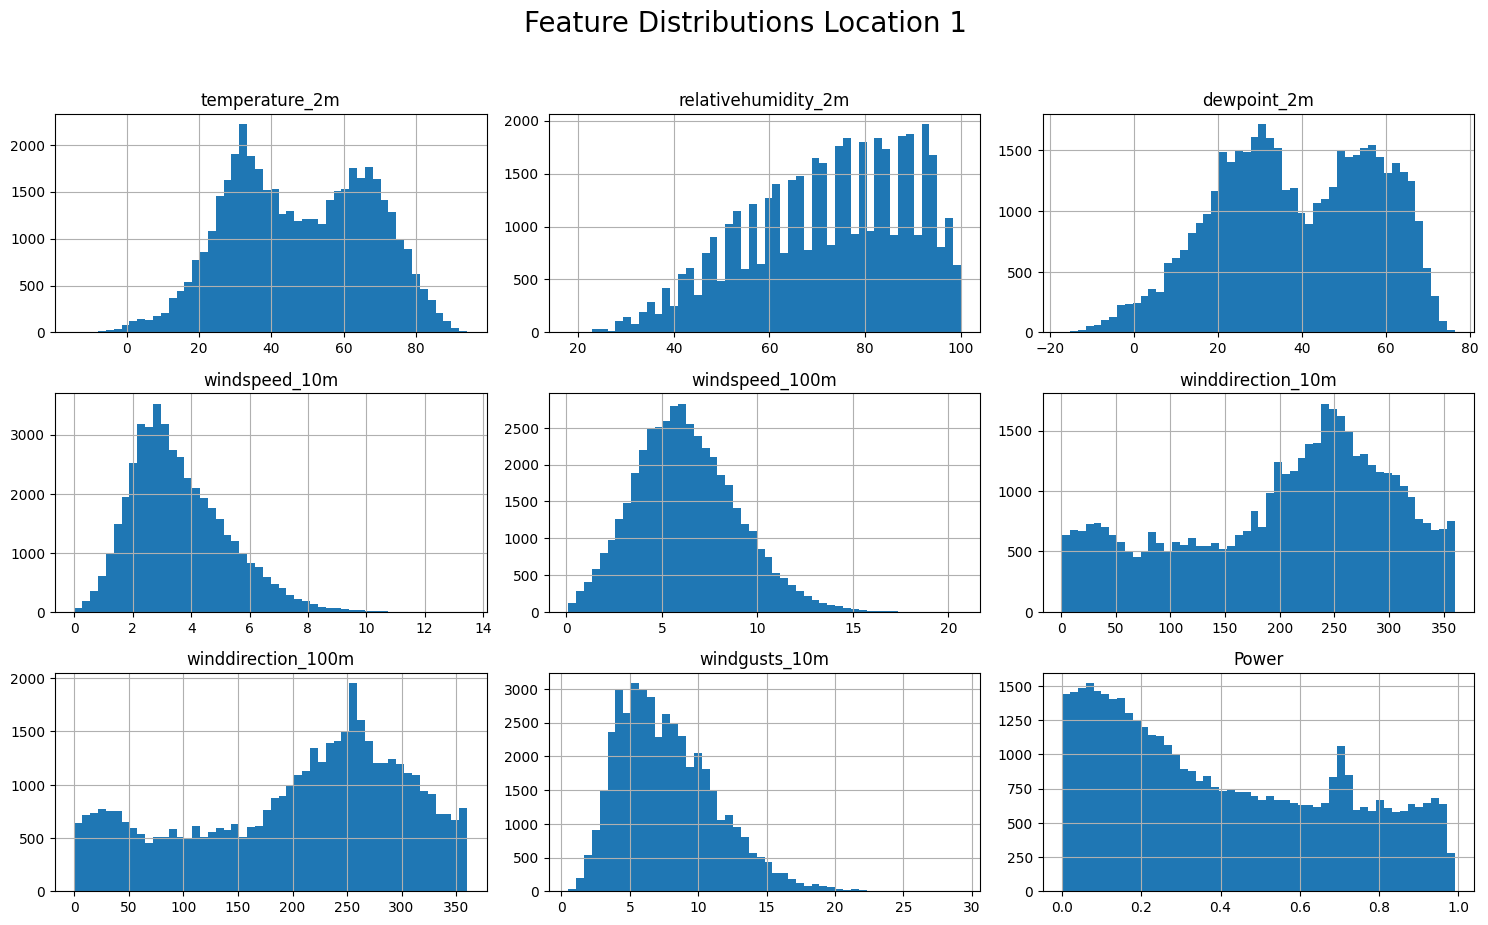

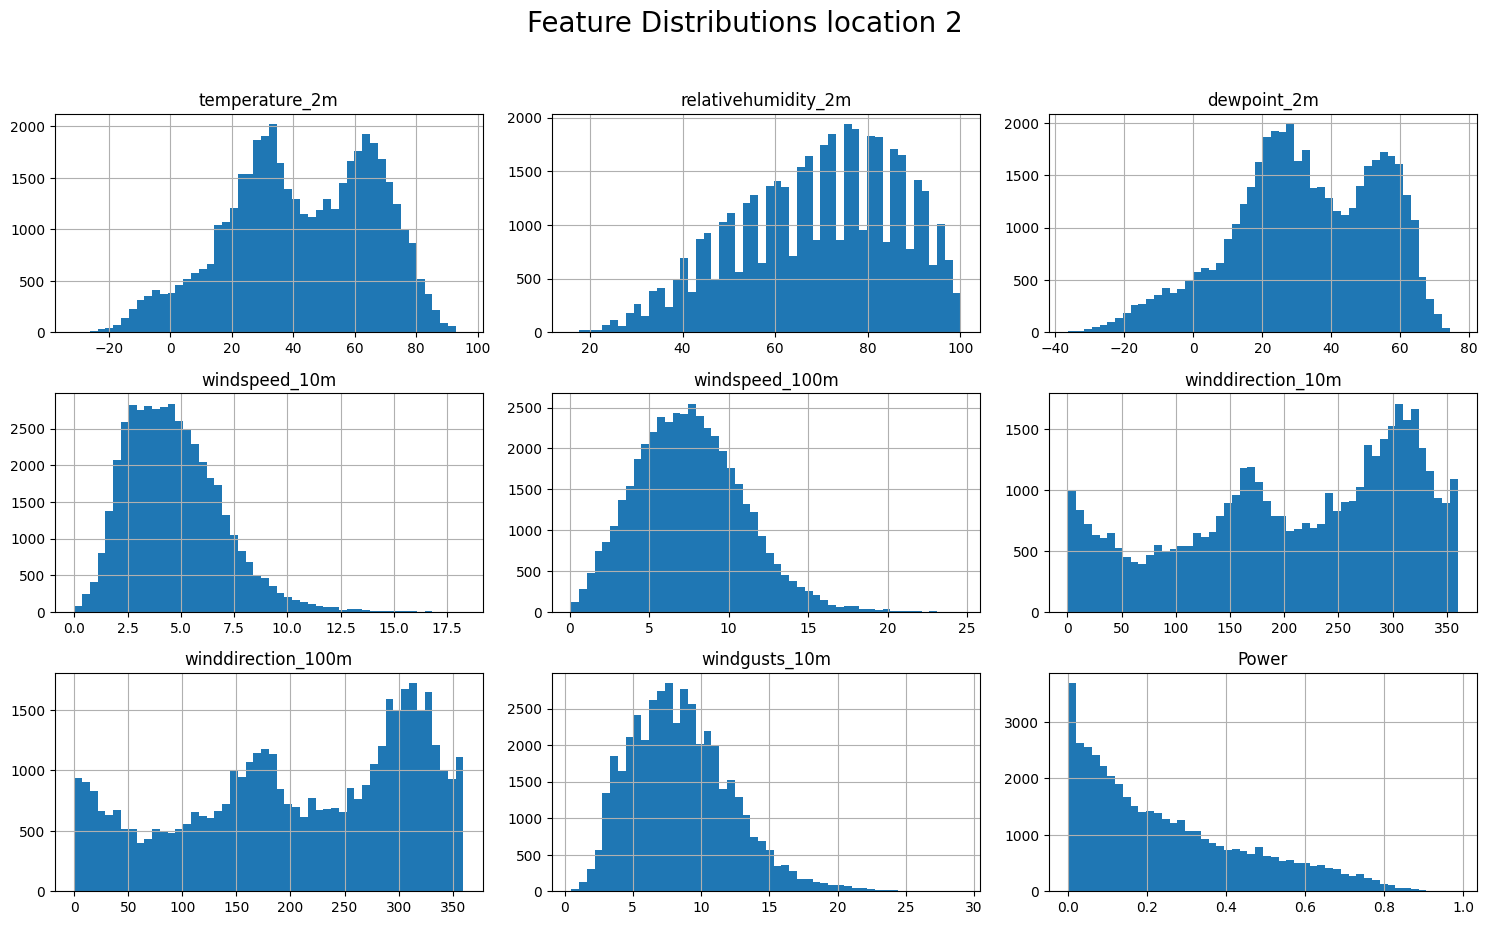

In [75]:
# Plot distributions
df.hist(figsize=(15, 12), bins=50, layout=(4, 3))
plt.suptitle("Feature Distributions Location 1", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Plot distributions
df2.hist(figsize=(15, 12), bins=50, layout=(4, 3))
plt.suptitle("Feature Distributions location 2", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

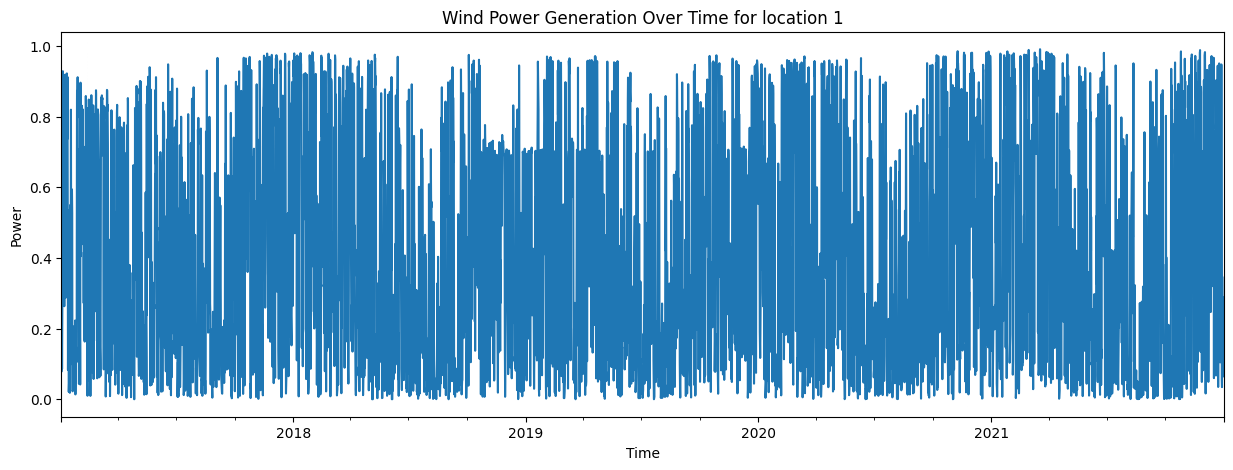

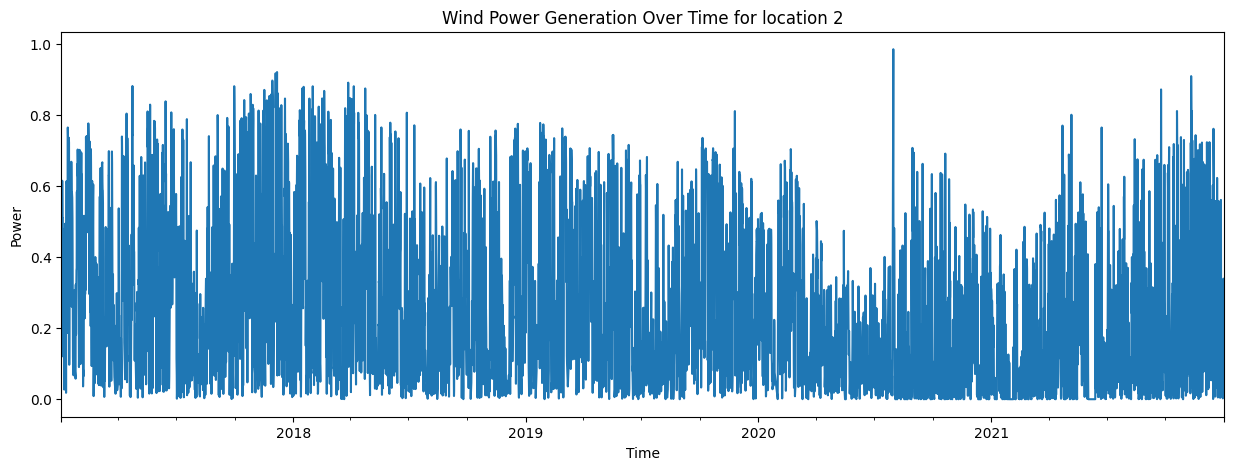

In [76]:
# Plot Power over time
plt.figure(figsize=(15,5))
df['Power'].plot()
plt.title("Wind Power Generation Over Time for location 1")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

# Plot Power over time
plt.figure(figsize=(15,5))
df2['Power'].plot()
plt.title("Wind Power Generation Over Time for location 2")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_78285/3453703962.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_power = df['Power'].resample('M').mean()


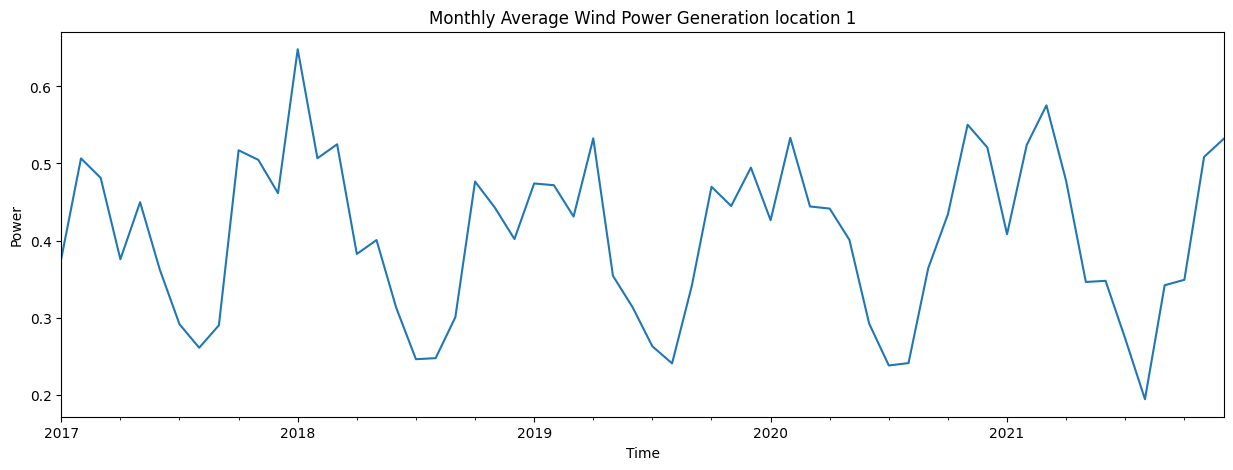

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_78285/3453703962.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_power = df2['Power'].resample('M').mean()


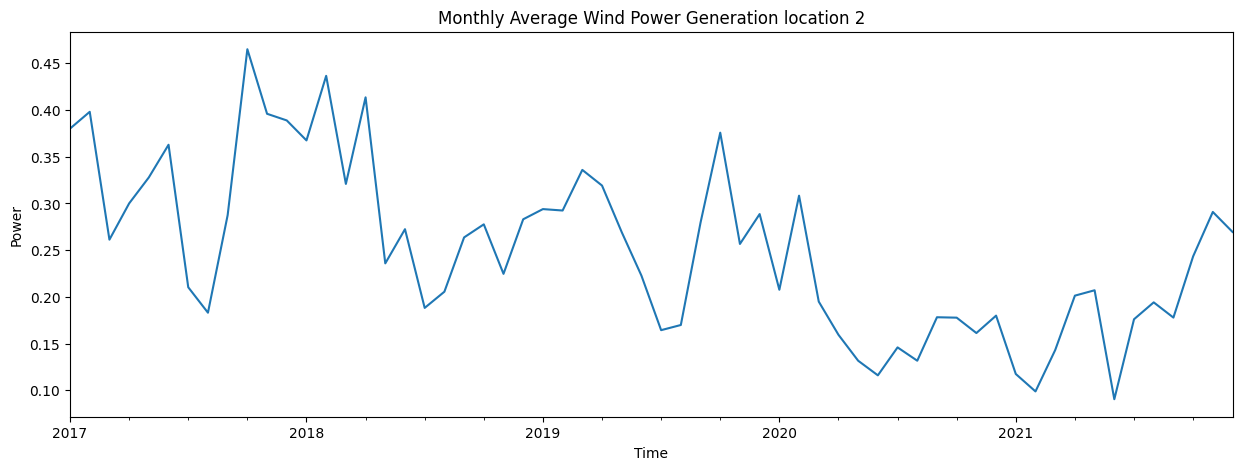

In [77]:
# Resample to monthly mean to observe trends
monthly_power = df['Power'].resample('M').mean()
plt.figure(figsize=(15,5))
monthly_power.plot()
plt.title("Monthly Average Wind Power Generation location 1")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

# Resample to monthly mean to observe trends
monthly_power = df2['Power'].resample('M').mean()
plt.figure(figsize=(15,5))
monthly_power.plot()
plt.title("Monthly Average Wind Power Generation location 2")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()

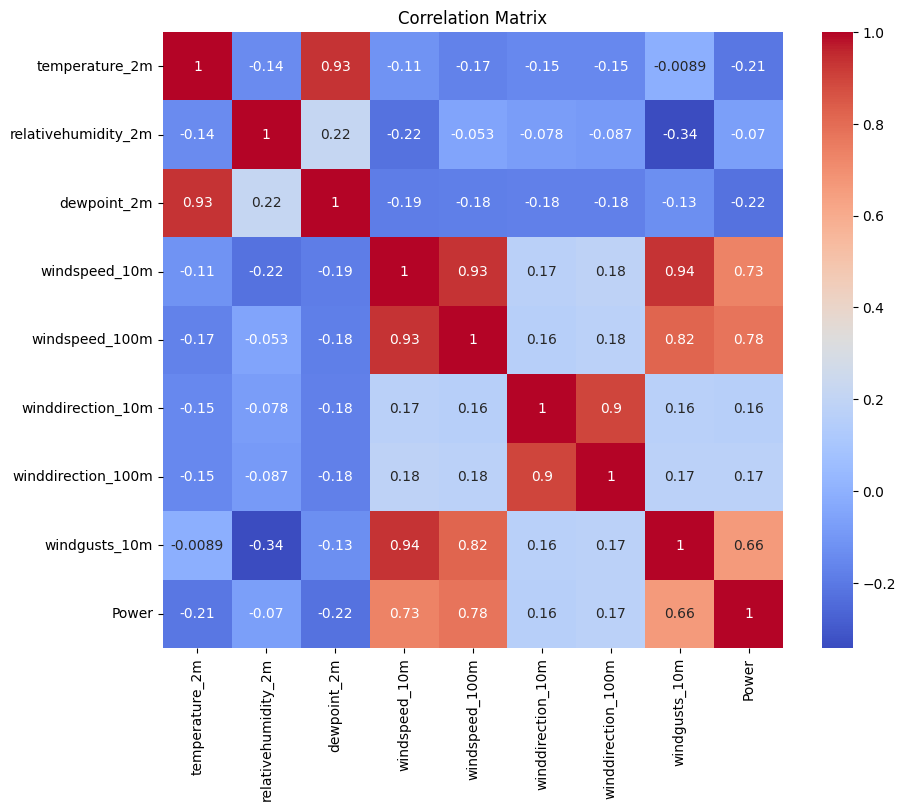

In [31]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

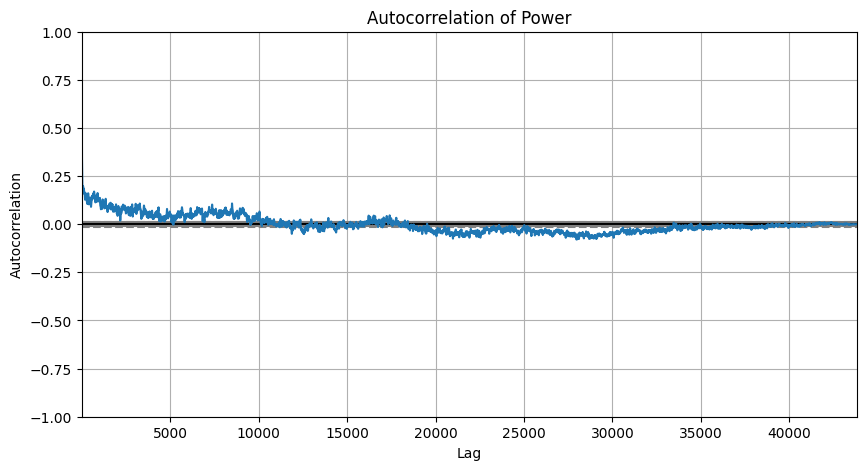

In [88]:
# Autocorrelation plot for Power
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
autocorrelation_plot(df2['Power'])
plt.title("Autocorrelation of Power")
plt.show()

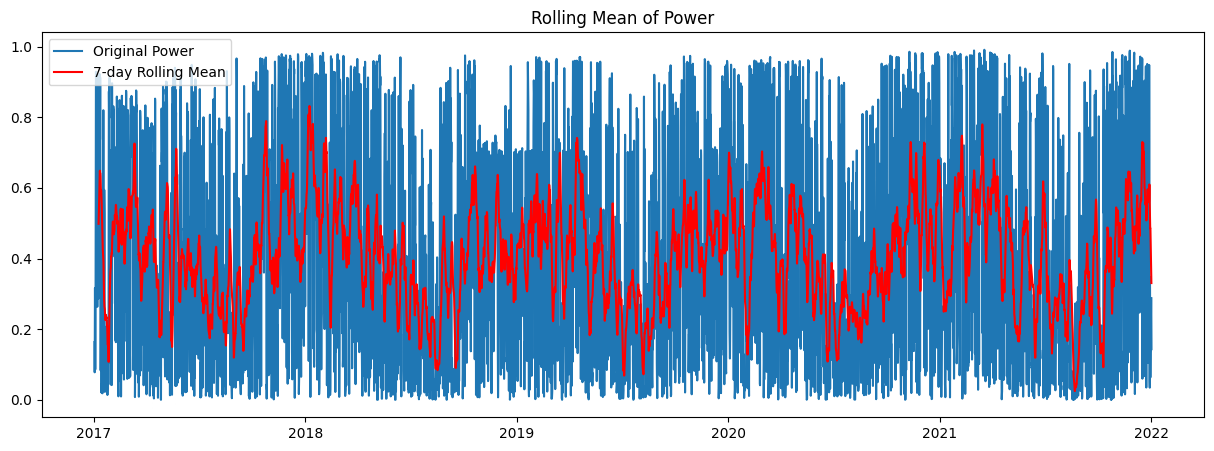

In [81]:
# Rolling Statistics
rolling_window = 24*7 # 7 days rolling window for hourly data
df['Power_roll_mean'] = df['Power'].rolling(window=rolling_window).mean()

plt.figure(figsize=(15,5))
plt.plot(df['Power'], label='Original Power')
plt.plot(df['Power_roll_mean'], color='red', label='7-day Rolling Mean')
plt.title("Rolling Mean of Power")
plt.legend()
plt.show()

In [82]:
#  ADF Test (Stationarity Check)
result = adfuller(df['Power'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

if result[1] < 0.05:
    print("Time series is stationary")
else:
    print("Time series is NOT stationary")

ADF Statistic: -19.63387251654793
p-value: 0.0
Critical Value 1%: -3.430499498988984
Critical Value 5%: -2.8616060752745827
Critical Value 10%: -2.5668051697196077
Time series is stationary


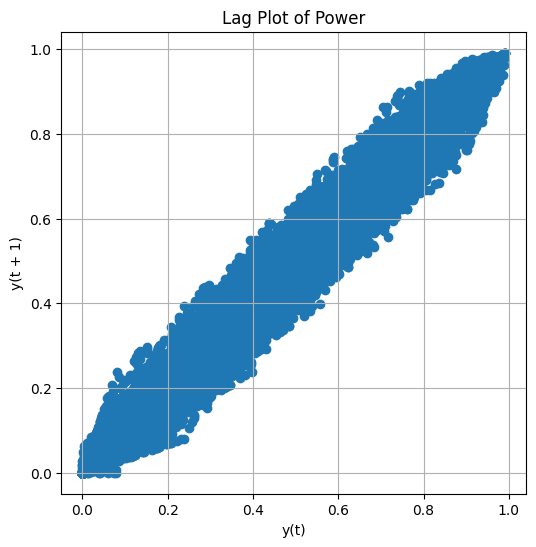

In [90]:
#  Lag Plot
plt.figure(figsize=(6,6))
lag_plot(df['Power'])
plt.title("Lag Plot of Power")
plt.grid()
plt.show()

<Figure size 1000x500 with 0 Axes>

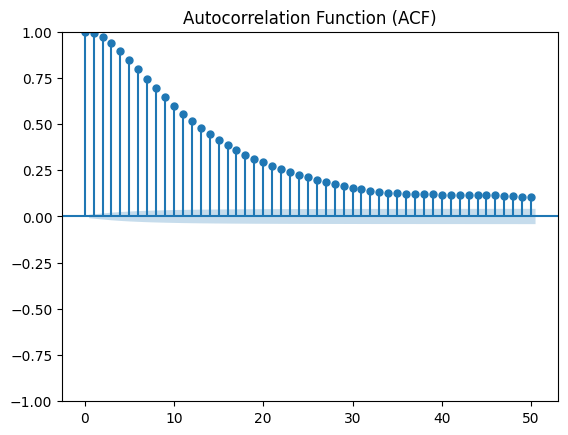

<Figure size 1000x500 with 0 Axes>

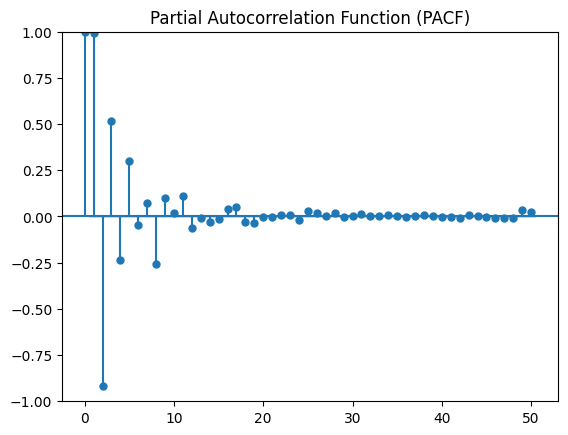

In [43]:
#  Autocorrelation & Partial Autocorrelation Plot
plt.figure(figsize=(10,5))
plot_acf(df['Power'].dropna(), lags=50)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(10,5))
plot_pacf(df['Power'].dropna(), lags=50)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


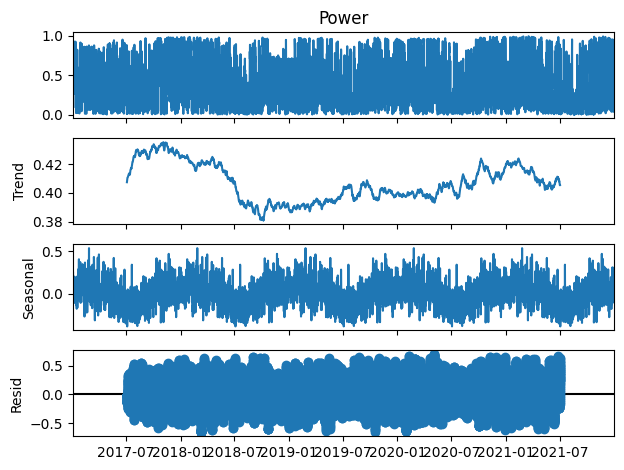

In [67]:
# Seasonal Decomposition (Repeat for yearly seasonality)

result = seasonal_decompose(df['Power'], model='additive', period=24*365)
result.plot()
plt.show()

In [45]:
# Correlation with other features
correlation = df.corr()['Power'].sort_values(ascending=False)
print("\nCorrelation with Power:\n", correlation)


Correlation with Power:
 Power                  1.000000
windspeed_100m         0.778704
windspeed_10m          0.732801
windgusts_10m          0.662677
Power_roll_mean        0.371567
winddirection_100m     0.171619
winddirection_10m      0.157623
relativehumidity_2m   -0.070360
temperature_2m        -0.207101
dewpoint_2m           -0.223739
Name: Power, dtype: float64


In [46]:
# Hourly, Daily, Monthly Seasonality Analysis
df['hour'] = df.index.hour
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

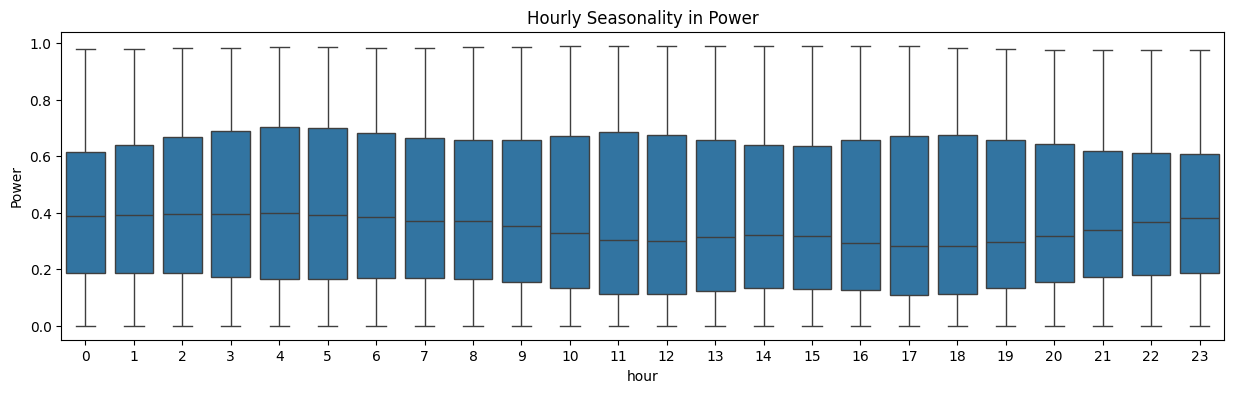

In [47]:
plt.figure(figsize=(15,4))
sns.boxplot(x='hour', y='Power', data=df)
plt.title("Hourly Seasonality in Power")
plt.show()

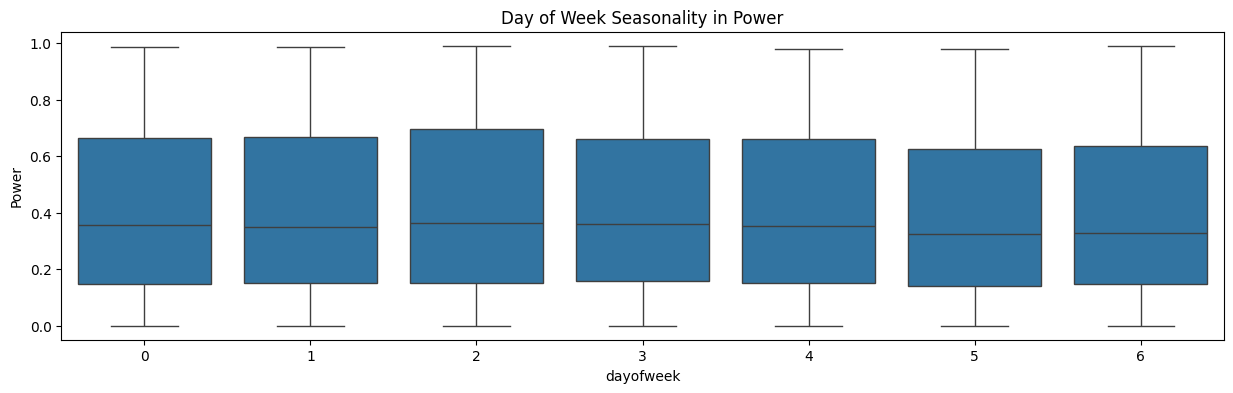

In [48]:
plt.figure(figsize=(15,4))
sns.boxplot(x='dayofweek', y='Power', data=df)
plt.title("Day of Week Seasonality in Power")
plt.show()

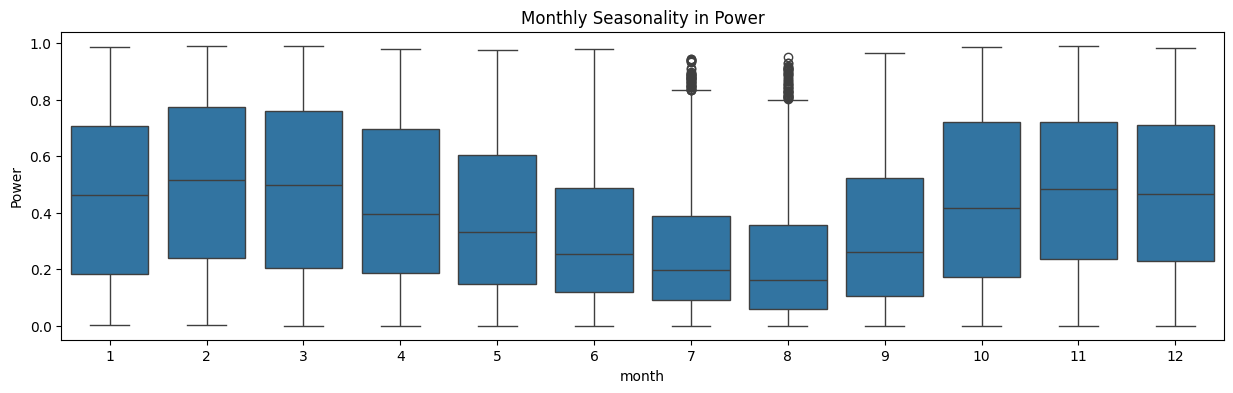

In [49]:
plt.figure(figsize=(15,4))
sns.boxplot(x='month', y='Power', data=df)
plt.title("Monthly Seasonality in Power")
plt.show()

DatetimeIndex(['2021-12-31 14:00:00'], dtype='datetime64[ns]', name='Time', freq=None)

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Power_roll_mean,hour,month,dayofweek
Time,,,,,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,NaN,0,1,0
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,NaN,1,1,0
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,NaN,2,1,0
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,NaN,3,1,0
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,NaN,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-20 03:00:00,31.8,71,23.6,4.23,7.94,187,191,8.0,0.5797,0.583110,3,11,5
2021-11-20 04:00:00,32.1,70,23.3,4.52,8.20,185,189,8.6,0.6405,0.582738,4,11,5
2021-11-20 05:00:00,32.4,71,24.0,4.50,8.16,183,187,8.8,0.6846,0.582517,5,11,5
